<a href="https://colab.research.google.com/github/Faxriddin80/Faxriddin80/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install mediapipe opencv-python

In [20]:
from google.colab import files
uploaded = files.upload()

Saving face.jpg to face.jpg


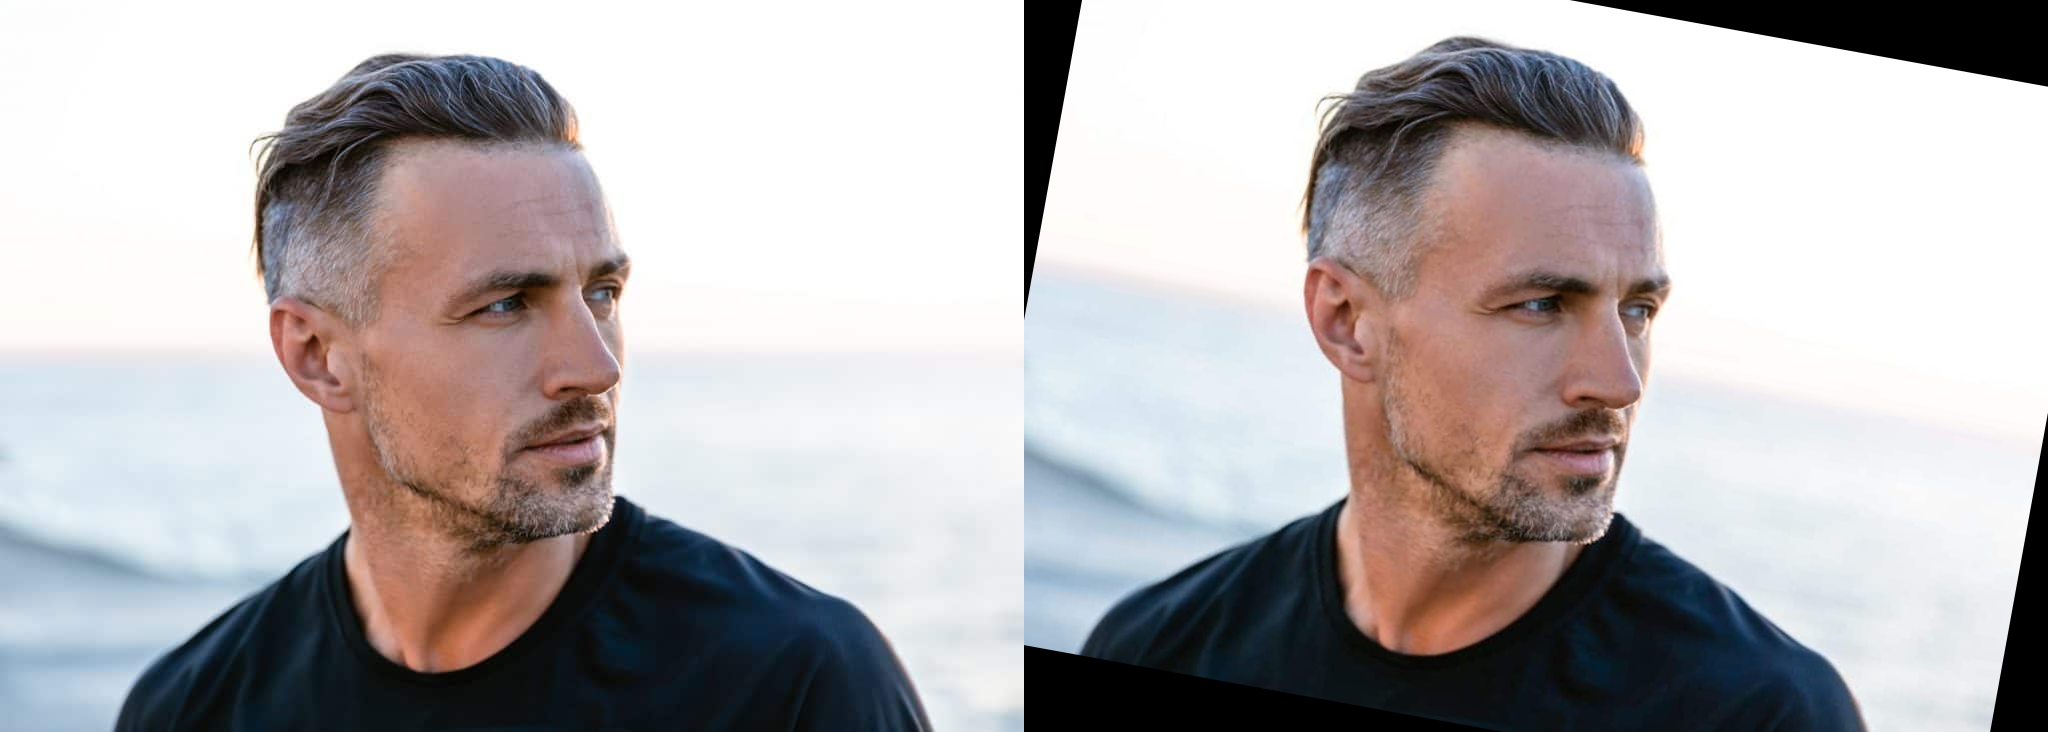

✔ Natija tayyor: fixed_face.jpg


In [21]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

mp_face_mesh = mp.solutions.face_mesh

def fix_face_orientation(image_path):
    # Asl rasmni o‘qiymiz
    img = cv2.imread(image_path)

    if img is None:
        print("❌ Rasm topilmadi! Colabga rasmni yuklab, fayl nomini tekshiring.")
        return

    orig = img.copy()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # FaceMesh ishga tushiramiz
    with mp_face_mesh.FaceMesh(static_image_mode=True) as face_mesh:
        results = face_mesh.process(img_rgb)

        if not results.multi_face_landmarks:
            print("❌ Yuz aniqlanmadi!")
            return

        h, w = img.shape[:2]
        landmarks = results.multi_face_landmarks[0].landmark

        # Ko‘z koordinatalari
        left_eye = (int(landmarks[33].x * w), int(landmarks[33].y * h))
        right_eye = (int(landmarks[263].x * w), int(landmarks[263].y * h))

        # Ko‘zlar orasidagi burchak
        dx = right_eye[0] - left_eye[0]
        dy = right_eye[1] - left_eye[1]
        angle = np.degrees(np.arctan2(dy, dx))

        # Aylantirish
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
        rotated = cv2.warpAffine(img, M, (w, h))

        # Yonma-yon ko‘rsatish
        combined = np.hstack((orig, rotated))

        cv2_imshow(combined)
        cv2.imwrite("fixed_face.jpg", rotated)
        print("✔ Natija tayyor: fixed_face.jpg")

# Chaqarish
fix_face_orientation("face.jpg")
